# TP numéro 2: Manipulation d'images

## Introduction

Nous allons dans ce TP manipuler des images au format PPM et plus spécifiquement le sous-format P3 pour les images couleurs. 

L'avantage pour nous de ce format est que les images sont enregistrées sur le disque comme des fichiers textes (donc encodés en ASCII sur le disque).

Ceci en fait un format peu utilisé en réalité car la place de chaque image sur le disque est importante. C'est néanmoins un format existant.


Maintenant vous allez commencer par regarder le contenu d'un fichier .ppm. Pour cela, dans le dossier *pict* sur votre gauche vous trouverez un fichier nommé *mini_damier.ppm*. 

Il s'agit d'un fichier ppm minimal qui représente une image de 4 pixels seulement. 2 pixels de large sur 2 pixels de haut.

Faites un clic droit dessus et choisissez *download*. Cela télécharge le fichier sur le disque dur de la machine que vous êtes en train d'utiliser.

Ouvrez le fichier en cliquant simplement dessus. Au besoin, zoomez beaucoup car l'image est vraiment petite. Vous devriez voir un quatre pixels, deux nois et deux blancs en quinconce.

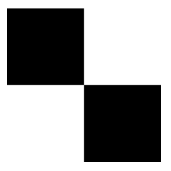

Voici le contenu du fichier:
>   P3</br>
>   2 2 255</br>
>   0 0 0</br>
>   255 255 255</br>
>   255 255 255</br>
>   0 0 0</br>

Vous voyez que le fichier commence par le sous format ppm utilisé (i.e., P3). On a ensuite 3 entiers dont les deux premiers représentent la largeur et la hauteur de l'image. Le troisième ne sera pas utilisé et toujours à 255.
Ensuite, chaque triplet de valeur représente les valeurs R, G et B d'un pixel.

Vous pouvez maintenant ouvrir le fichier avec un éditeur de texte et modifier les deux pixels blancs par des gris moyen, c'est à dire obtenir le fichier suivant:
>   P3</br>
>   2 2 255</br>
>   0 0 0</br>
>   127 127 127</br>
>   127 127 127</br>
>   0 0 0</br>

Si vous regardez à nouveau l'image résultante vous aurez l'image suivante:

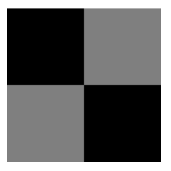

Bien sûr, notre but n'est pas de modifier les fichiers à la main mais de le faire en écrivant un algorithme en python.

## chargement et affichage d'images ppm

Afin de pouvoir manipuler plus facilement des images ppm, vous allez importer le module iiwHelper que je vous fournis avec le sujet. Pour ceci exécuter la cellule ci dessous.

In [1]:
import cv2
from iiwHelper import *

La cellule précédente fournit des informations utiles utilisées dans les deux cellules suivantes. 

Comprenez les cellules suivantes avant de continuer. 

Vous pouvez bien sûr les exécuter pour voir ce qu'elles font.

Rappel: la manière de définir le chemin vers un fichier a été abordée dans le cours #3

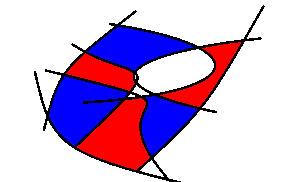

In [2]:
showImageFromPath('./pict/Oeuvre_d_art.ppm')

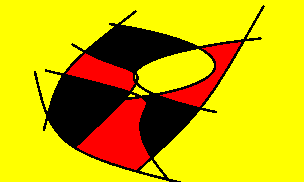

In [9]:
img :ImagePPM = loadImage("./pict/Oeuvre_d_art.ppm")

index: int = int(0)

while (index < len(img.pixels)):
    p: Pixel = img.pixels[index]
    p.r = 0
    index = index + 1

showImage(img)
saveImage(img,"./pict/modified/Oeuvre_d_art2.ppm")

Dans la celulle précédente, la fonction *loadImage* renvoie une image de type ImagePPM. Le type ImagePPM est tel que:

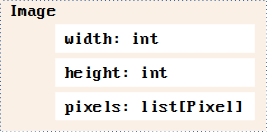

où le type Pixel est définit tel que

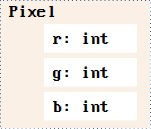

Soit en Python, le code suivant:

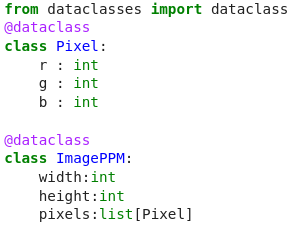

Expliquer ce que fait la cellule précédente. Modifiez là et regardez l'impact de vos modifications

## Remplacement de Pixels

On 

In [4]:
img :ImagePPM = loadImage("./pict/EU_propre.ppm")

index: int = int(0)

while (index < len(img.pixels)):
    p: Pixel = img.pixels[index]
    v: int = int(0.2126 * p.r + 0.7152 * p.g + 0.0722 * p.b)
    p.r = v
    p.g = v
    p.b = v
    index = index + 1
    
saveImage(img,"./pict/EU_gray.ppm")

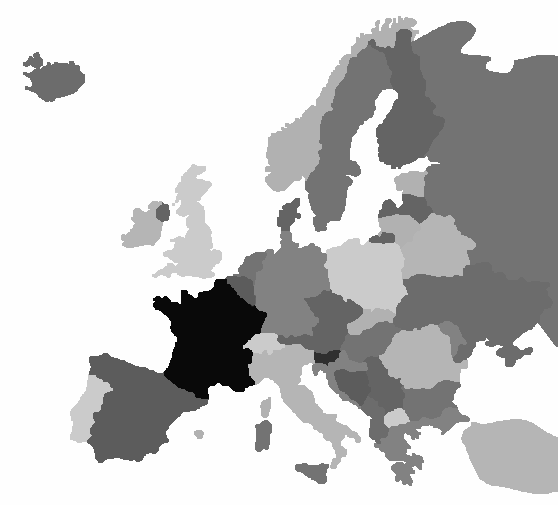

In [5]:
showImageFromPath("./pict/EU_gray.ppm")

## Éclaircissement bords d'image

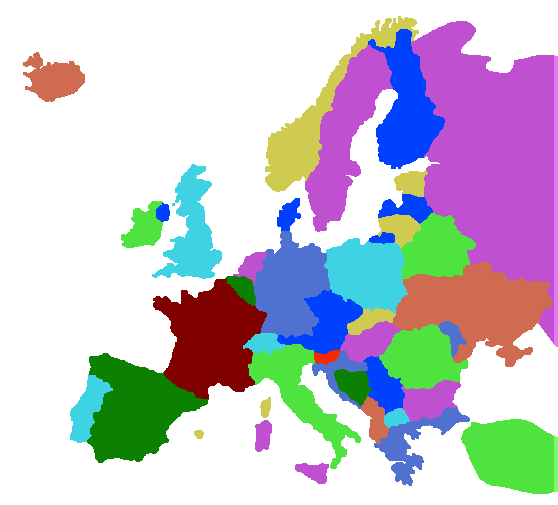

In [6]:
img :Image = loadImage("./pict/EU_propre.ppm")

pixelsToChange: list[Pixel] = []
index: int = int(0)
indexLastPix: int = len(img.pixels)-1

while (index < img.width):
    pixelsToChange = pixelsToChange + [img.pixels[index], img.pixels[index+img.width], img.pixels[index+2*img.width], img.pixels[index+3*img.width]]
    pixelsToChange = pixelsToChange + [img.pixels[indexLastPix-index], img.pixels[indexLastPix-(index+img.width)], img.pixels[indexLastPix-(index+2*img.width)], img.pixels[indexLastPix-(index+3*img.width)]]
    index = index + 1

index = 4

while (index < (img.height-4)):
    pixelsToChange = pixelsToChange + [img.pixels[index*img.width], img.pixels[index*img.width+1], img.pixels[index*img.width+2], img.pixels[index*img.width+3]]
    pixelsToChange = pixelsToChange + [img.pixels[index*img.width+(img.width-1)], img.pixels[index*img.width+(img.width-2)], img.pixels[index*img.width+(img.width-3)], img.pixels[index*img.width+(img.width-4)]]
    index = index + 1
    
index = 0    
while (index < len(pixelsToChange)):
    p: Pixel = pixelsToChange[index]
    if (p.r < 215):
        p.r = p.r + 40
    else:
        p.r = 255
    if (p.g < 215):
        p.g = p.g + 40
    else:
        p.g = 255
    if (p.b < 215):
        p.b = p.b + 40
    else:
        p.b = 255
    index = index + 1
    
saveImage(img,"./pict/modified/EU_propre.ppm")
showImageFromPath("./pict/modified/EU_propre.ppm")